# Mechanism of DM-WM interplay in RNNs

Rotation-addition interaction as a mechanism of DM-WM interplay in RNNs for Figures 8a-f.

In [1]:
import sys
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import vonmises
from scipy.linalg import circulant

sys.path.append('../src/model_rnn/')
from rnn_bias import *
import rnn_bias.train as dt
import rnn_bias.analysis as da

sys.path.append('..')
from src import utils
utils.setup_matplotlib()

In [2]:
%%capture
utils.download_dataset("data/outputs/rnn")

with open('../data/outputs/rnn/hom/trained_J.pickle', 'rb') as f:
    J_hom = pickle.load(f)

with open('../data/outputs/rnn/het/trained_J.pickle', 'rb') as f:
    J_het = pickle.load(f)

with open('../data/outputs/rnn/results_state_space.pickle', 'rb') as f:
    state = pickle.load(f)

---
## Connectivity analysis

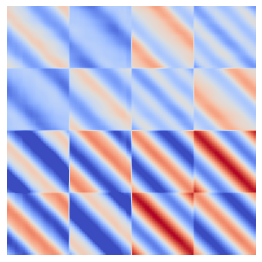

In [3]:
concat  = np.concatenate
m_upper = concat([J_hom['J11'].mean(axis=0), J_hom['J12'].mean(axis=0)],axis=1)
m_lower = concat([J_hom['J21'].mean(axis=0), J_hom['J22'].mean(axis=0)],axis=1)
m_total_homo = concat([m_upper,m_lower],axis=0)

plt.figure()
ax = plt.gca()
utils.set_size([3,3])

plt.imshow(m_total_homo, clim=[-0.35,0.35], cmap='coolwarm')
plt.axis('off')
plt.tight_layout()
plt.savefig(f'{utils.DIR_FIGURE}/sfig8a_left.pdf',bbox_inches='tight')
plt.show()

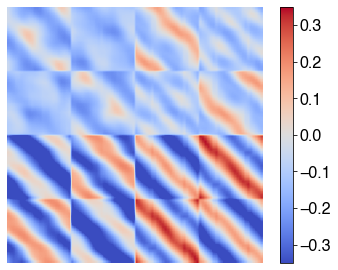

In [4]:
m_upper = concat([J_het['J11'].mean(axis=0), J_het['J12'].mean(axis=0)],axis=1)
m_lower = concat([J_het['J21'].mean(axis=0), J_het['J22'].mean(axis=0)],axis=1)
m_total_het = concat([m_upper,m_lower],axis=0)

plt.figure()
ax = plt.gca()
utils.set_size([4,3])

plt.imshow(m_total_het, clim=[-0.35,0.35], cmap='coolwarm')
plt.axis('off')
plt.colorbar()
plt.tight_layout()
plt.savefig(f'{utils.DIR_FIGURE}/sfig8a_right.pdf',bbox_inches='tight')
plt.show()

In [5]:
def zero_one_norm(vec):
    _min, _max = np.min(vec), np.max(vec)
    return (vec - _min) / (_max - _min)

r_like = utils.TWLT.colors[17]
b_like = utils.TWLT.colors[7]

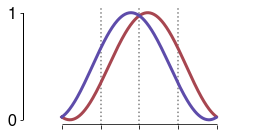

In [6]:
vx = np.linspace(0,2*np.pi,num=24,endpoint=False)
temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    # r_R_ccw to r_R_ccw
    temp_conv[v_s,0] = np.sum(J_hom['J11'].mean(axis=0)[:24,:24] * circ)
    # r_R_cw to r_R_cw
    temp_conv[v_s,1] = np.sum(J_hom['J11'].mean(axis=0)[24:,24:] * circ)

plt.figure()
ax = plt.gca()
utils.set_size([3.,1.6])

plt.axvline(x=0, linestyle='dotted', color='gray')
plt.axvline(x=-45, linestyle='dotted', color='gray')
plt.axvline(x=45, linestyle='dotted', color='gray')
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)
plt.xlim([-135,135])

plt.xticks([-90,-45,0,45,90], [])
utils.draw_publish_axis(ax, xrange=(-90,90), yrange=(0,1), xticks=None, yticks=[0,1])

if utils.LABEL:
    plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")    
    plt.ylabel("Normalized template response")

plt.savefig(f'{utils.DIR_FIGURE}/sfig8b_ul.pdf',bbox_inches='tight')
plt.show()

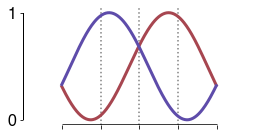

In [7]:
vx = np.linspace(0,2*np.pi,num=24,endpoint=False)
temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    # r_R_ccw to r_R_cw
    temp_conv[v_s,0] = np.sum(J_hom['J11'].mean(axis=0)[:24,24:] * circ)
    # r_R_cw to r_R_ccw
    temp_conv[v_s,1] = np.sum(J_hom['J11'].mean(axis=0)[24:,:24] * circ)

plt.figure()
ax = plt.gca()
utils.set_size([3.,1.6])

plt.axvline(x=0, linestyle='dotted', color='gray')
plt.axvline(x=-45, linestyle='dotted', color='gray')
plt.axvline(x=45, linestyle='dotted', color='gray')
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)
plt.xlim([-135,135])
plt.xticks([-90,-45,0,45,90], [])
utils.draw_publish_axis(ax, xrange=(-90,90), yrange=(0,1), xticks=None, yticks=[0,1])

if utils.LABEL:
    plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")    
    plt.ylabel("Normalized template response")

plt.savefig(f'{utils.DIR_FIGURE}/sfig8b_ur.pdf',bbox_inches='tight')
plt.show()

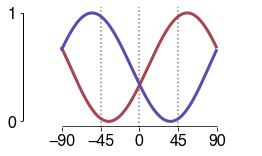

In [8]:
vx = np.linspace(0,2*np.pi,num=24,endpoint=False)
temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    # r_R_cw to r_theta 
    temp_conv[v_s,0] = np.sum(J_hom['J12'].mean(axis=0)[24:,24:] * circ)
    # r_R_ccw to r_theta
    temp_conv[v_s,1] = np.sum(J_hom['J12'].mean(axis=0)[:24,:24] * circ)

plt.figure()
ax = plt.gca()
utils.set_size([3.,1.8])

plt.axvline(x=0, linestyle='dotted', color='gray')
plt.axvline(x=-45, linestyle='dotted', color='gray')
plt.axvline(x=45, linestyle='dotted', color='gray')
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)
plt.xlim([-135,135])
utils.draw_publish_axis(ax, xrange=(-90,90), yrange=(0,1), xticks=[-90,-45,0,45,90], yticks=[0,1])

if utils.LABEL:
    plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")    
    plt.ylabel("Normalized template response")

plt.savefig(f'{utils.DIR_FIGURE}/sfig8b_ll.pdf',bbox_inches='tight')
plt.show()

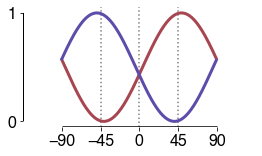

In [9]:
vx = np.linspace(0,2*np.pi,num=24,endpoint=False)
temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    # r_theta to r_R_ccw
    temp_conv[v_s,0] = np.sum(J_hom['J21'].mean(axis=0)[:24,:24] * circ)
    # r_theta to r_R_cw
    temp_conv[v_s,1] = np.sum(J_hom['J21'].mean(axis=0)[24:,24:] * circ)

plt.figure()
ax = plt.gca()
utils.set_size([3.,1.8])

plt.axvline(x=0, linestyle='dotted', color='gray')
plt.axvline(x=-45, linestyle='dotted', color='gray')
plt.axvline(x=45, linestyle='dotted', color='gray')
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
plt.plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)
plt.xlim([-135,135])
utils.draw_publish_axis(ax, xrange=(-90,90), yrange=(0,1), xticks=[-90,-45,0,45,90], yticks=[0,1])

if utils.LABEL:
    plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")    
    plt.ylabel("Normalized template response")

plt.savefig(f'{utils.DIR_FIGURE}/sfig8b_lr.pdf',bbox_inches='tight')
plt.show()

---
## Temporal localization

In [10]:
labels = np.linspace(0,2*np.pi,  num=24,endpoint=False)
stims  = np.linspace(-np.pi,np.pi,num=24,endpoint=False)
t1     = 5   # starting time point
s      = 14  # near-cardinal 
cols_r = ['#F7B4BB', '#F46D75', '#BA0001']
cols_b = ['#b3c3f3', '#8da5ed', '#5478e4']

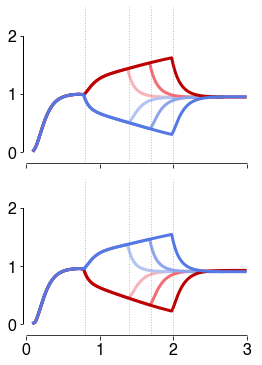

In [11]:
f,ax = plt.subplots(2,1,sharey=True, sharex=True)
utils.set_size([3,4])

ax[0].axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
ax[1].axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
plt.ylim([-0.2,2.5])

for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    radiusw_cw  = state['pca'].transform(state['r1_hom'][durn][t1:t2,s,1,0,24:])
    radiusl_cw  = state['pca'].transform(state['r1_hom'][durn][t1:t2,s,1,0,:24])
    radiusw_ccw = state['pca'].transform(state['r1_hom'][durn][t1:t2,s,0,0,24:])
    radiusl_ccw = state['pca'].transform(state['r1_hom'][durn][t1:t2,s,0,0,:24])
    
    radiusw_cw  = np.sqrt(radiusw_cw[:,0]**2  + radiusw_cw[:,1]**2 )
    radiusl_cw  = np.sqrt(radiusl_cw[:,0]**2  + radiusl_cw[:,1]**2 )
    radiusw_ccw = np.sqrt(radiusw_ccw[:,0]**2 + radiusw_ccw[:,1]**2)
    radiusl_ccw = np.sqrt(radiusl_ccw[:,0]**2 + radiusl_ccw[:,1]**2)
    
    ax[0].plot(np.arange(t1,t2)*0.02, radiusw_cw,  color=cols_r[duri], linewidth=3)
    ax[0].plot(np.arange(t1,t2)*0.02, radiusw_ccw, color=cols_b[duri], linewidth=3)
    ax[1].plot(np.arange(t1,t2)*0.02, radiusl_cw,  color=cols_r[duri], linewidth=3)
    ax[1].plot(np.arange(t1,t2)*0.02, radiusl_ccw, color=cols_b[duri], linewidth=3)
    
    ax[0].axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
    ax[1].axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)

for i_fig in range(2):
    utils.draw_publish_axis(ax[i_fig], xrange=(0,3), yrange=(0,2), xticks=[0,1,2,3], yticks=[0,1,2])

plt.savefig(f'{utils.DIR_FIGURE}/sfig8d_left.pdf',bbox_inches='tight')
plt.show()

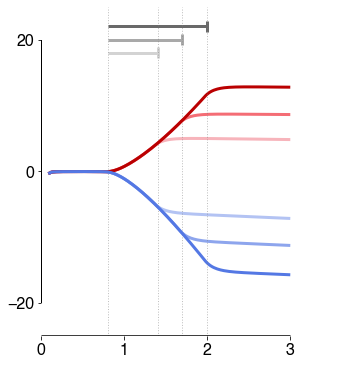

In [12]:
greys = ['lightgrey', 'darkgrey', 'dimgrey']
f,ax = plt.subplots(1,1, sharey=True)
utils.set_size([4,4])

plt.xlim([0,3.7])
plt.ylim([-25,25])
ax.axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    traj_cw  = utils.pop_vector_decoder((state['r2_hom'][durn][t1:,:,0,0,:24]+\
                                         state['r2_hom'][durn][t1:,:,0,0,24:])/2., 
                                        labels, unit='radian', data='direction')
    traj_ccw = utils.pop_vector_decoder((state['r2_hom'][durn][t1:,:,1,0,:24]+\
                                         state['r2_hom'][durn][t1:,:,1,0,24:])/2., 
                                        labels, unit='radian', data='direction')
    
    traj_cw  = utils.wrap(traj_cw -labels[None])*90/np.pi
    traj_ccw = utils.wrap(traj_ccw-labels[None])*90/np.pi
    
    ax.plot(np.arange(t1,150)*0.02, traj_cw[:,s],  color=cols_r[duri], linewidth=3)
    ax.plot(np.arange(t1,150)*0.02, traj_ccw[:,s], color=cols_b[duri], linewidth=3)

    ax.axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)

    ax.vlines(t2*0.02-1, 18+2*duri-0.8, 18+2*duri+0.8, color=greys[duri], linewidth=3)
    ax.hlines(18+2*duri, 0.8, t2*0.02-1, color=greys[duri], linewidth=3)

utils.draw_publish_axis(ax, xrange=(0,3), yrange=(-20,20), xticks=[0,1,2,3], yticks=[-20,0,20])
plt.savefig(f'{utils.DIR_FIGURE}/sfig8e_left.pdf',bbox_inches='tight')
plt.show()

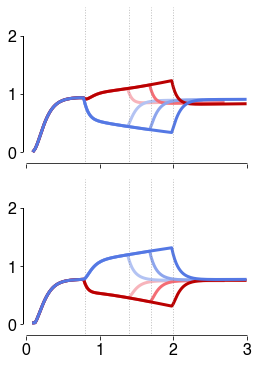

In [13]:
f,ax = plt.subplots(2,1,sharey=True, sharex=True)
utils.set_size([3,4])

ax[0].axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
ax[1].axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
plt.ylim([-0.2,2.5])

for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    radiusw_cw  = state['pca'].transform(state['r1_het'][durn][t1:t2,s,1,0,24:])
    radiusl_cw  = state['pca'].transform(state['r1_het'][durn][t1:t2,s,1,0,:24])
    radiusw_ccw = state['pca'].transform(state['r1_het'][durn][t1:t2,s,0,0,24:])
    radiusl_ccw = state['pca'].transform(state['r1_het'][durn][t1:t2,s,0,0,:24])
    
    radiusw_cw  = np.sqrt(radiusw_cw[:,0]**2  + radiusw_cw[:,1]**2 )
    radiusl_cw  = np.sqrt(radiusl_cw[:,0]**2  + radiusl_cw[:,1]**2 )
    radiusw_ccw = np.sqrt(radiusw_ccw[:,0]**2 + radiusw_ccw[:,1]**2)
    radiusl_ccw = np.sqrt(radiusl_ccw[:,0]**2 + radiusl_ccw[:,1]**2)
    
    ax[0].plot(np.arange(t1,t2)*0.02, radiusw_cw,  color=cols_r[duri], linewidth=3)
    ax[0].plot(np.arange(t1,t2)*0.02, radiusw_ccw, color=cols_b[duri], linewidth=3)
    ax[1].plot(np.arange(t1,t2)*0.02, radiusl_cw,  color=cols_r[duri], linewidth=3)
    ax[1].plot(np.arange(t1,t2)*0.02, radiusl_ccw, color=cols_b[duri], linewidth=3)
    
    ax[0].axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
    ax[1].axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)

for i_fig in range(2):
    utils.draw_publish_axis(ax[i_fig], xrange=(0,3), yrange=(0,2), xticks=[0,1,2,3], yticks=[0,1,2])

plt.savefig(f'{utils.DIR_FIGURE}/sfig8d_right.pdf',bbox_inches='tight')
plt.show()

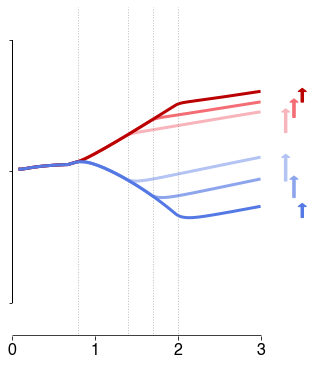

In [14]:
f,ax = plt.subplots(1,1, sharey=True)
utils.set_size([4,4])

plt.xlim([0,3.7])
plt.ylim([-25,25])
ax.axvline(x=0.8, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    traj_cw  = utils.pop_vector_decoder((state['r2_het'][durn][t1:,:,0,0,:24]+\
                                         state['r2_het'][durn][t1:,:,0,0,24:])/2., 
                                        labels, unit='radian', data='direction')
    traj_ccw = utils.pop_vector_decoder((state['r2_het'][durn][t1:,:,1,0,:24]+\
                                         state['r2_het'][durn][t1:,:,1,0,24:])/2., 
                                        labels, unit='radian', data='direction')
    
    traj_cw  = utils.wrap(traj_cw -labels[None])*90/np.pi
    traj_ccw = utils.wrap(traj_ccw-labels[None])*90/np.pi
    
    ax.plot(np.arange(t1,150)*0.02, traj_cw[:,s],  color=cols_r[duri], linewidth=3)
    ax.plot(np.arange(t1,150)*0.02, traj_ccw[:,s], color=cols_b[duri], linewidth=3)

    ax.axvline(x=t2*0.02-1., linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
    ax.arrow(3.3+0.1*duri, 
             traj_cw[ t2-50,s], 0, (traj_cw[ -1,s]-traj_cw[ t2-50,s]), 
             color=cols_r[duri], head_width=0.1, head_length=0.5, width=0.03, zorder=3)
    ax.arrow(3.3+0.1*duri, 
             traj_ccw[t2-50,s], 0, (traj_ccw[-1,s]-traj_ccw[t2-50,s]), 
             color=cols_b[duri], head_width=0.1, head_length=0.5, width=0.03, zorder=3)

utils.draw_publish_axis(ax, xrange=(0,3), yrange=(-20,20), xticks=[0,1,2,3], yticks=[-20,0,20])
ax.set_yticklabels([])
plt.savefig(f'{utils.DIR_FIGURE}/sfig8e_right.pdf',bbox_inches='tight')
plt.show()